In [1]:
cd ..

/conv


In [2]:
%autosave 600
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# CENTER PLOTS
from IPython.core.display import HTML
display(HTML(""" <style> .output_png {display: table-cell; text-align: center; margin:auto; }
.prompt display:none;}  </style>"""))

Autosaving every 600 seconds


In [3]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = ""

import torch
torch.set_num_threads(4)

In [4]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

%matplotlib inline

In [5]:
from skopt import BayesSearchCV

from utils.visualize import plot_2D_decision_boundary_SSL
from utils.data import get_train_dev_test_ssl, DATASETS
from utils.data.helpers import merge_train_dev

from sklearn.neural_network import MLPClassifier
from skssl.classifiers import LabelSpreading
from skssl.meta import SelfTrainingMeta

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


# Easy Data

SelfTraining MLP


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/conv/skssl/meta/selftraining.py", line 80, in fit
    self.model.fit(merged_X, merged_y, sample_weight=samples_weight)
TypeError: fit() got an unexpected keyword argument 'sample_weight'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 3296, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-6-734c8a5860d9>", line 15, in <module>
    m = basemodel.fit(train.X, train.y)
  File "/conv/skssl/meta/selftraining.py", line 83, in fit
    self.model.fit(merged_X, merged_y)
  File "/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py", line 982, in fit
    hasattr(self, "classes_")))
  File "/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py", line 375, in _fit
    intercept_grads, layer_units)
  File "/u

TypeError: must be str, not list

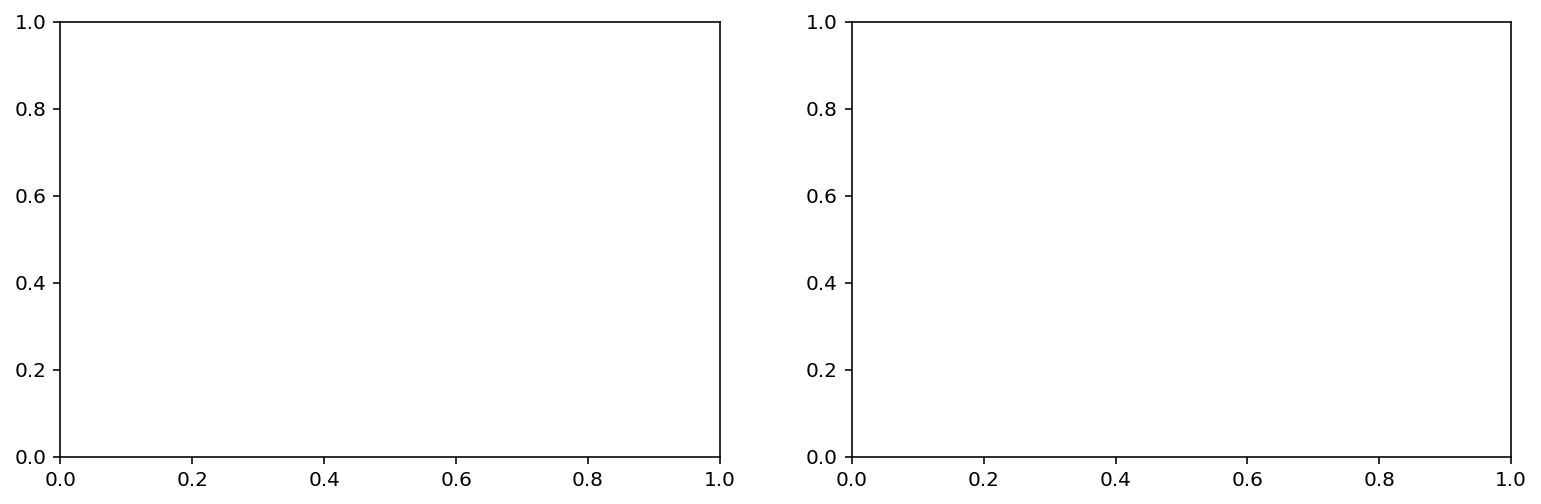

In [6]:
models = [("SelfTraining MLP",SelfTrainingMeta(MLPClassifier(solver="lbfgs"), max_iter=50)), 
          ("LabelSpreading",LabelSpreading())]

is_hard = False

for d in DATASETS:
    if d in ["cifar10","svhn","mnist"]:
        pass
    else:
        F,axs=plt.subplots(1,2, figsize=(13,4))
        train, dev, test = get_train_dev_test_ssl(d, n_labels=None, is_hard=is_hard)

        for i,(name, basemodel) in enumerate(models):
            print(name)
            m = basemodel.fit(train.X, train.y)
            plot_2D_decision_boundary_SSL(train.X, train.y, m, mesh_stepsize=0.1, ax=axs[i])
            print(name, "dev score: %s" % m.score(dev.X, dev.y))
            print(name, "test score: %s" % m.score(test.X, test.y))
            print()
        

In [15]:
t=t.unsqueeze(1)

In [7]:
import torch
t=torch.nn.functional.one_hot(torch.arange(6).view(2,3))

# Hard Data

SelfTraining MLP


/master/skssl/meta/selftraining.py:89: UserWarning: Stopping self training after 6 iterations, because no more changes.
  warnings.warn("Stopping self training after {} iterations, because no more changes.".format(i))


SelfTraining MLP dev score: 0.965
SelfTraining MLP test score: 0.9616

LabelSpreading
LabelSpreading dev score: 0.949
LabelSpreading test score: 0.9436

SelfTraining MLP


/master/skssl/meta/selftraining.py:89: UserWarning: Stopping self training after 14 iterations, because no more changes.
  warnings.warn("Stopping self training after {} iterations, because no more changes.".format(i))


SelfTraining MLP dev score: 0.94
SelfTraining MLP test score: 0.9362

LabelSpreading
LabelSpreading dev score: 0.969
LabelSpreading test score: 0.966

SelfTraining MLP


/master/skssl/meta/selftraining.py:89: UserWarning: Stopping self training after 4 iterations, because no more changes.
  warnings.warn("Stopping self training after {} iterations, because no more changes.".format(i))


SelfTraining MLP dev score: 0.946
SelfTraining MLP test score: 0.9432

LabelSpreading
LabelSpreading dev score: 0.97
LabelSpreading test score: 0.964

SelfTraining MLP


/master/skssl/meta/selftraining.py:89: UserWarning: Stopping self training after 4 iterations, because no more changes.
  warnings.warn("Stopping self training after {} iterations, because no more changes.".format(i))


SelfTraining MLP dev score: 0.973
SelfTraining MLP test score: 0.9757

LabelSpreading
LabelSpreading dev score: 0.952
LabelSpreading test score: 0.9521

SelfTraining MLP


/master/skssl/meta/selftraining.py:89: UserWarning: Stopping self training after 8 iterations, because no more changes.
  warnings.warn("Stopping self training after {} iterations, because no more changes.".format(i))


SelfTraining MLP dev score: 0.991
SelfTraining MLP test score: 0.9878

LabelSpreading
LabelSpreading dev score: 0.993
LabelSpreading test score: 0.9924



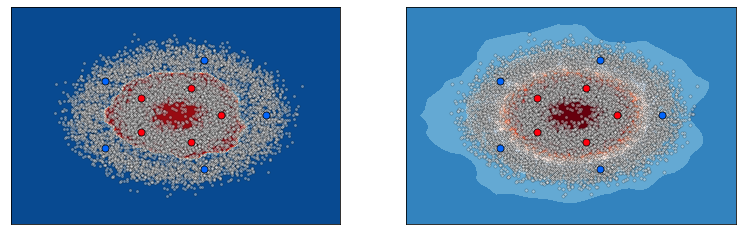

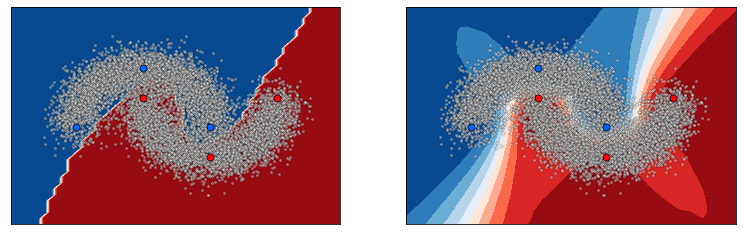

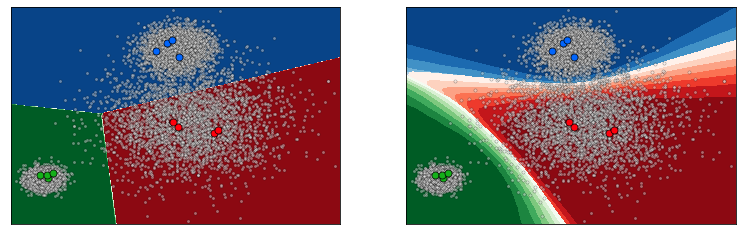

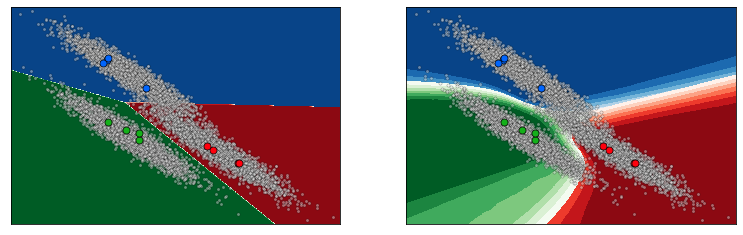

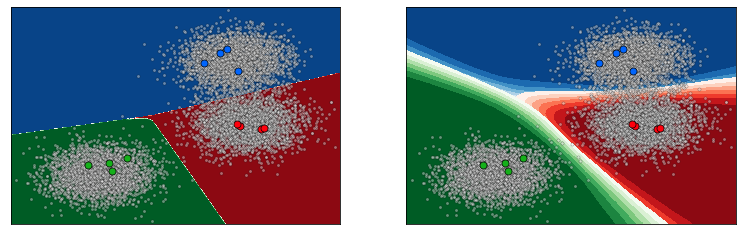

In [14]:
from sklearn.neural_network import MLPClassifier
from skssl.classifiers import LabelSpreading
from skssl.meta import SelfTrainingMeta

models = [("SelfTraining MLP",SelfTrainingMeta(MLPClassifier(solver="lbfgs"), max_iter=50)), 
          ("LabelSpreading",LabelSpreading())]

is_hard = True

for d in DATASETS:
    if d in ["cifar10","svhn","mnist"]:
        pass
    else:
        F,axs=plt.subplots(1,2, figsize=(13,4))
        train, dev, test = get_train_dev_test_ssl(d, n_labels=None, is_hard=is_hard)

        for i,(name, basemodel) in enumerate(models):
            print(name)
            m = basemodel.fit(train.X, train.y)
            plot_2D_decision_boundary_SSL(train.X, train.y, m, mesh_stepsize=0.1, ax=axs[i])
            print(name, "dev score: %s" % m.score(dev.X, dev.y))
            print(name, "test score: %s" % m.score(test.X, test.y))
            print()
        

In [ ]:
from sklearn.neural_network import MLPClassifier
from skssl.classifiers import LabelSpreading
from skssl.meta import SelfTrainingMeta

models = [("LabelSpreading",LabelSpreading())]

is_hard = True

F,axs=plt.subplots(2,2, figsize=(14,10))

j=0
for d in DATASETS:
    if d in ["cifar10","svhn","mnist", "pts_iso_gaus"]:
        pass
    else:
        
        train, dev, test = get_train_dev_test_ssl(d, n_labels=None, is_hard=is_hard)

        for i,(name, basemodel) in enumerate(models):
            print(name)
            m = basemodel.fit(train.X, train.y)
            plot_2D_decision_boundary_SSL(train.X, train.y, m, mesh_stepsize=0.1, ax=axs[j//2, j%2])
            print(name, "dev score: %s" % m.score(dev.X, dev.y))
            print(name, "test score: %s" % m.score(test.X, test.y))
            print()
            
        j+=1
        

LabelSpreading
LabelSpreading dev score: 0.949
LabelSpreading test score: 0.9436

LabelSpreading
LabelSpreading dev score: 0.969
LabelSpreading test score: 0.966

LabelSpreading
LabelSpreading dev score: 0.97
LabelSpreading test score: 0.964

LabelSpreading
LabelSpreading dev score: 0.952
LabelSpreading test score: 0.9521



LabelSpreading
LabelSpreading dev score: 0.949
LabelSpreading test score: 0.9436

LabelSpreading
LabelSpreading dev score: 0.969
LabelSpreading test score: 0.966

LabelSpreading
LabelSpreading dev score: 0.97
LabelSpreading test score: 0.964

LabelSpreading
LabelSpreading dev score: 0.952
LabelSpreading test score: 0.9521



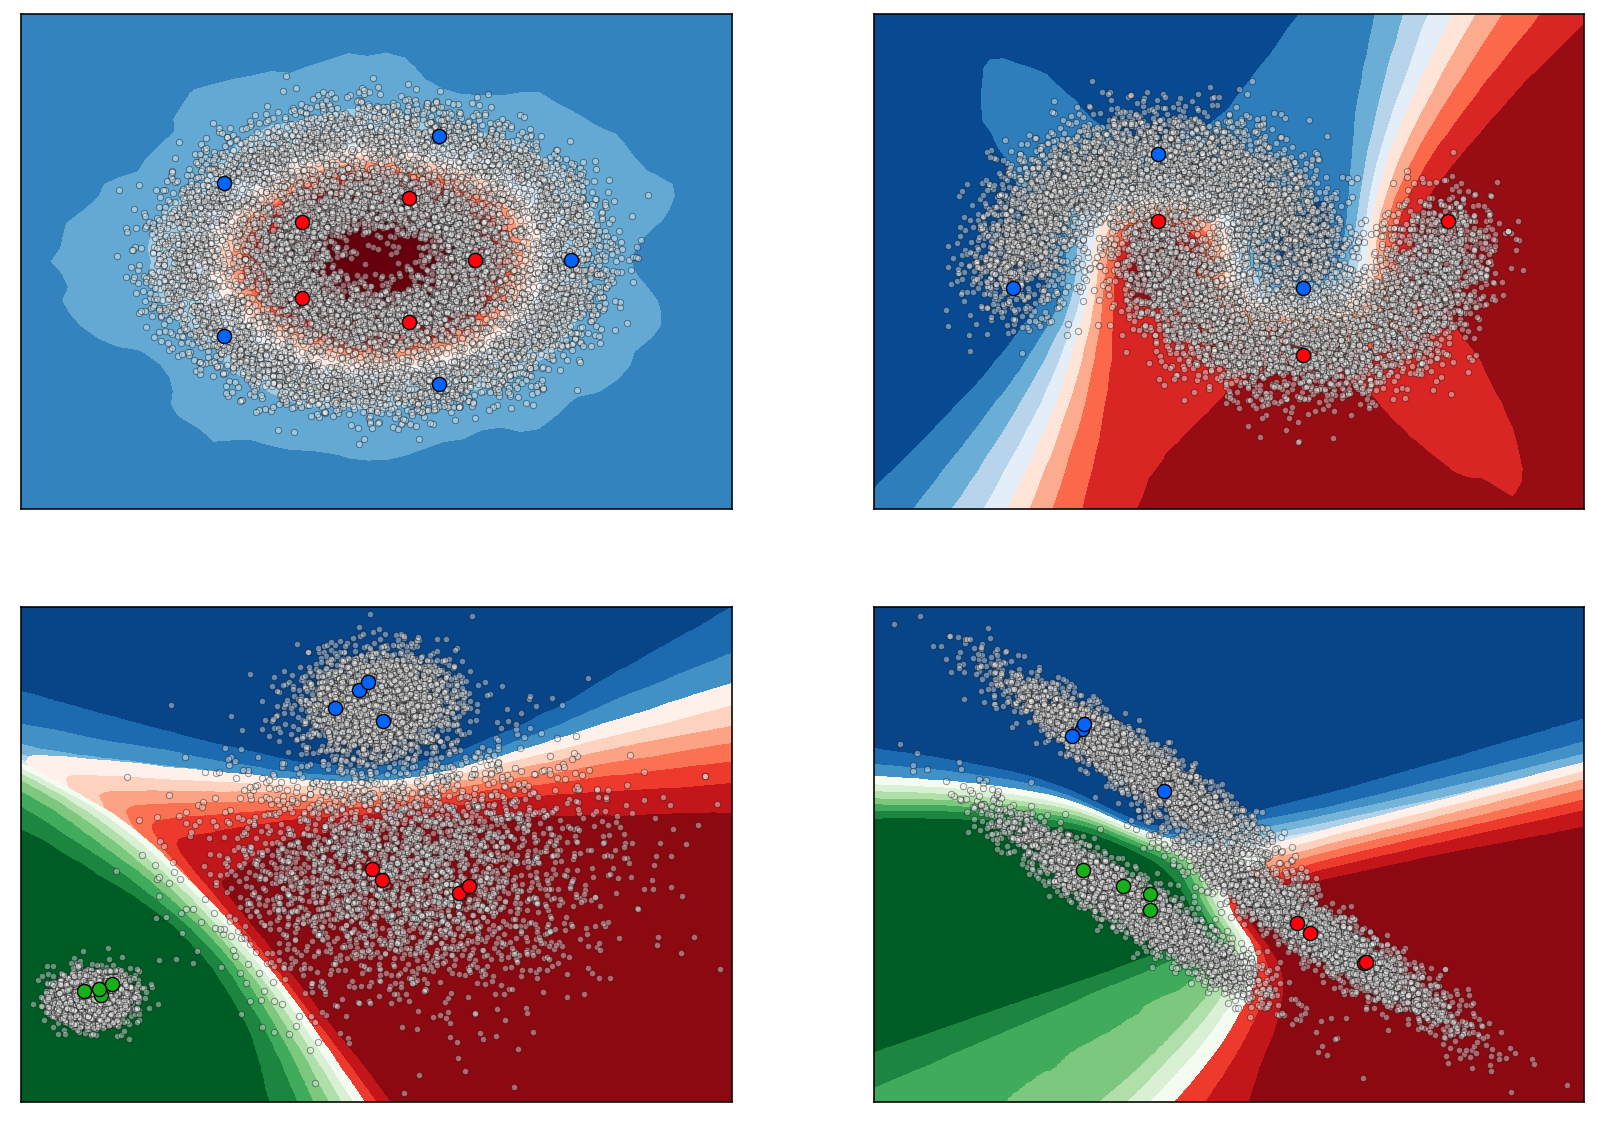

In [8]:
from sklearn.neural_network import MLPClassifier
from skssl.classifiers import LabelSpreading
from skssl.meta import SelfTrainingMeta

models = [("LabelSpreading",LabelSpreading())]

is_hard = True

F,axs=plt.subplots(2,2, figsize=(14,10))

j=0
for d in DATASETS:
    if d in ["cifar10","svhn","mnist", "pts_iso_gaus"]:
        pass
    else:
        
        train, dev, test = get_train_dev_test_ssl(d, n_labels=None, is_hard=is_hard)

        for i,(name, basemodel) in enumerate(models):
            print(name)
            m = basemodel.fit(train.X, train.y)
            plot_2D_decision_boundary_SSL(train.X, train.y, m, mesh_stepsize=0.1, ax=axs[j//2, j%2])
            print(name, "dev score: %s" % m.score(dev.X, dev.y))
            print(name, "test score: %s" % m.score(test.X, test.y))
            print()
            
        j+=1
        

In [9]:
(0.9436 + 0.966 + 0.964 + 0.9521)/4

0.9564249999999999